In [2]:
#Importamos las librerias necesarias
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [3]:
#Construimos la lista de adyacencia 

graph = {
    'Oradea' : [('Zerind', 71), ('Sibiu', 151)],
    'Zerind' : [('Oradea', 71), ('Arad', 75)],
    'Arad' : [('Sibiu', 140), ('Zerind', 75), ('Timisoara', 118)],
    'Timisoara' : [('Arad', 118), ('Lugoj', 111)],
    'Sibiu' : [('Oradea', 151), ('Arad', 140), ('Fagaras', 99), ('Rimnicu Vilcea', 80)],
    'Lugoj' : [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia' : [('Lugoj', 70), ('Dobreta', 75)],
    'Dobreta' : [('Mehadia', 75), ('Craiova', 120)],
    'Craiova' : [('Dobreta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
    'Rimnicu Vilcea' : [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)],
    'Fagaras' : [('Sibiu', 99), ('Bucharest', 211)],
    'Pitesti' : [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Bucharest' : [('Pitesti', 101), ('Fagaras', 211), ('Giurgiu', 90), ('Urziceni', 85)],
    'Giurgiu' : [('Bucharest', 90)],
    'Urziceni' : [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Hirsova' : [('Urziceni', 98), ('Eforie', 86)],
    'Eforie' : [('Hirsova', 86)],
    'Vaslui' : [('Urziceni', 142), ('Iasi', 92)],
    'Iasi' : [('Vaslui', 92), ('Neamt', 87)],
    'Neamt' : [('Iasi', 87)]
}


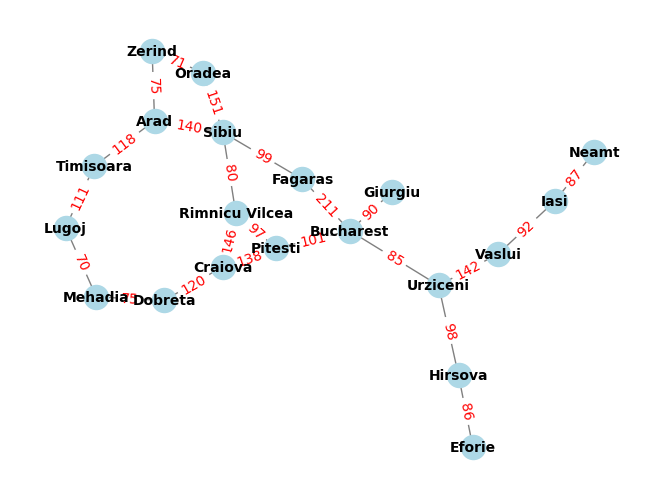

In [4]:
#Grafo

#Creamos el grafo
G = nx.Graph()

#Agregamos los nodos
for node in graph:
    G.add_node(node)

#Agregamos las aristas
for node in graph:
    for edge in graph[node]:
        G.add_edge(node, edge[0], weight=edge[1])
    
#Imprimimos el grafo
#print(G.edges(data=True))

#Graficamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=1, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

### Uso de funcion heuristica manual

En este caso, el nodo inicial es Craiova y el nodo objetivo es Bucharest.

Calculamos f(n):

Craiova: g(Craiova) = 0, h(Craiova) = 160, f(Craiova) = 0 + 160 = 160  
Dobreta: g(Dobreta) = 120, h(Dobreta) = 242, f(Dobreta) = 120 + 242 = 362  
Rimnicu Vilcea: g(Rimnicu Vilcea) = 146, h(Rimnicu Vilcea) = 193, f(Rimnicu Vilcea) = 146 + 193 = 339  
Pitesti: g(Pitesti) = 276, h(Pitesti) = 98, f(Pitesti) = 276 + 98 = 374  
Bucharest: g(Bucharest) = 377, h(Bucharest) = 0, f(Bucharest) = 377 + 0 = 377  

Seleccionamos el valor f(n) más bajo.  
En este caso, el siguiente nodo a visitar sería Rimnicu Vilcea con f(n) = 339.   
Luego, se elegiría Pitesti con f(n) = 374, y finalmente Bucharest con f(n) = 377.

Por lo tanto, si el algoritmo se detiene al visitar Bucharest, se han visitado 4 nodos en total: Craiova, Rimnicu Vilcea, Pitesti y Bucharest.

In [5]:
def heuristic(node, goal):
    h = {
        'Arad': 366,
        'Bucharest': 0,
        'Craiova': 160,
        'Dobreta': 242,
        'Eforie': 161,
        'Fagaras': 178,
        'Giurgiu': 77,
        'Hirsova': 151,
        'Iasi': 226,
        'Lugoj': 244,
        'Mehadia': 241,
        'Neamt': 234,
        'Oradea': 380,
        'Pitesti': 98,
        'Rimnicu Vilcea': 193,
        'Sibiu': 253,
        'Timisoara': 329,
        'Urziceni': 80,
        'Vaslui': 199,
        'Zerind': 374,
    }
    return h[node]

def a_star_search(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))  # (f(n), nodo)
    came_from = {}  # registro de nodos visitados
    cost_so_far = {}  # registro de costos acumulados
    came_from[start] = None
    cost_so_far[start] = 0

    while frontier:
        current = heapq.heappop(frontier)[1]  # sacamos el nodo de menor costo f(n)
        if current == goal:
            break

        for neighbor, cost in graph[current]:
            new_cost = cost_so_far[current] + cost
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)  # f(n) = g(n) + h(n)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current

    # Reconstruimos el camino desde el objetivo hasta el inicio
    path = [goal]
    current = goal
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()

    # Contamos cuántos nodos fueron visitados
    visited = len(came_from)

    return path, visited

In [6]:
start = 'Craiova'
goal = 'Bucharest'
path, visited = a_star_search(graph, start, goal)
print(path) 
print(visited) 

['Craiova', 'Pitesti', 'Bucharest']
5
